<a href="https://colab.research.google.com/github/dcher95/universe7/blob/main/species/breedingbirdsurvey/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breeding Bird Survey EDA

Data Description: https://www.sciencebase.gov/catalog/file/get/64ad9c3dd34e70357a292cee?f=__disk__31%2Feb%2F01%2F31eb01b1aa27394b18f5c15e089c10d0aac224f7&transform=1&allowOpen=true

In [45]:
!pip install folium matplotlib mapclassify contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.0 MB/s eta 0:00:00


In [84]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import os
from shapely.ops import transform
import pyproj
from scipy.spatial import distance
import contextily as ctx

pd.options.display.max_rows = 999

In [106]:
with zipfile.ZipFile("/content/2023Release_Nor/States.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/2023Release_Nor/States")

with zipfile.ZipFile("/content/2023Release_Nor/50-StopData.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/2023Release_Nor/50-StopData")

with zipfile.ZipFile("/content/2023Release_Nor/MigrantNonBreeder.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/2023Release_Nor/Migrants")

In [79]:
# See StateNum here: https://www.sciencebase.gov/catalog/file/get/64ad9c3dd34e70357a292cee?f=__disk__31%2Feb%2F01%2F31eb01b1aa27394b18f5c15e089c10d0aac224f7&transform=1&allowOpen=true
state_num_dict = {2: 'Alabama', 3: 'Alaska', 4: 'Alberta', 6: 'Arizona', 7: 'Arkansa', 11: 'BritCol', 14: 'Califor', 17: 'Colorad', 18: 'Connect', 21: 'Delawar', 25: 'Florida',
                  27: 'Georgia', 33: 'Idaho', 34: 'Illinoi', 35: 'Indiana', 36: 'Iowa', 38: 'Kansas', 39: 'Kentuck', 42: 'Louisia', 43: 'NWTerri', 44: 'Maine', 45: 'Manitob',
                  46: 'Marylan', 47: 'Massach', 49: 'Michiga', 50: 'Minneso', 51: 'Mississ', 52: 'Missour', 53: 'Montana', 54: 'Nebrask', 55: 'Nevada', 56: 'NBrunsw', 57: 'Newfoun',
                  58: 'NHampsh', 59: 'NJersey', 60: 'NMexico', 61: 'NYork', 62: 'Nunavut', 63: 'NCaroli', 64: 'NDakota', 65: 'NovaSco', 66: 'Ohio', 67: 'Oklahom', 68: 'Ontario',
                  69: 'Oregon', 72: 'Pennsyl', 75: 'PEI', 76: 'Quebec', 77: 'RhodeIs', 79: 'Saskatc', 80: 'SCaroli', 81: 'SDakota', 82: 'Tenness', 83: 'Texas', 85: 'Utah',
                  87: 'Vermont', 88: 'Virgini', 89: 'Washing', 90: 'W_Virgi', 91: 'Wiscons', 92: 'Wyoming', 93: 'Yukon'}

In [146]:
state_data = pd.read_csv('/content/2023Release_Nor/States/Missour.csv')
state_data['StateNum'] = state_data['StateNum'].map(state_num_dict)
display(state_data.head())
state_data.shape

RouteDataID  CountryNum StateNum  Route  RPID  Year   AOU  Count10  \
0      6239075         840  Missour      1   101  1967  1440        1   
1      6239075         840  Missour      1   101  1967  2000        8   
2      6239075         840  Missour      1   101  1967  2730        1   
3      6239075         840  Missour      1   101  1967  2890        3   
4      6239075         840  Missour      1   101  1967  3131        0   

   Count20  Count30  Count40  Count50  StopTotal  SpeciesTotal  
0        0        0        0        0          1             1  
1        1        3        9        4         13            25  
2        2        0        0        1          3             4  
3        1        0        2        1          6             7  
4        1       10        4        5          7            20

(131515, 14)

In [38]:
stop_data = pd.read_csv('/content/2023Release_Nor/50-StopData/fifty1.csv')
display(stop_data.head())
stop_data.shape

RouteDataID  CountryNum  StateNum  Route  RPID  Year   AOU  Stop1  Stop2  \
0      6167164         124         4      1   101  2000   530      0      0   
1      6167164         124         4      1   101  2000   534     20     10   
2      6167164         124         4      1   101  2000   540      0      1   
3      6167164         124         4      1   101  2000   590      0     16   
4      6167164         124         4      1   101  2000  1200      0      0   

   Stop3  ...  Stop41  Stop42  Stop43  Stop44  Stop45  Stop46  Stop47  Stop48  \
0      0  ...       0       0       0       0       0       0       0       0   
1     14  ...       0       0       0       0       0       0       0       0   
2      0  ...       0       0       0       0       0       0       0       0   
3      0  ...       0       0       0       0       0       0       0       0   
4      0  ...       0       0       0       0       0       0       0       0   

   Stop49  Stop50  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 57 columns]

(371724, 57)

In [82]:
routes = pd.read_csv('/content/2023Release_Nor/routes.csv', encoding='ISO-8859-1')
routes['StateNum'] = routes['StateNum'].map(state_num_dict)
display(routes.head())
routes.shape

CountryNum StateNum  Route   RouteName  Active   Latitude  Longitude  \
0         840  Alabama      1  ST FLORIAN       1  34.868688 -87.604142   
1         840  Alabama      2   HILLSBORO       0  34.638675 -87.191292   
2         840  Alabama      3    FLORENCE       0  34.800000 -87.733333   
3         840  Alabama      4       TRADE       1  34.029788 -87.059235   
4         840  Alabama      5     SUMMITT       0  34.201669 -86.493409   

   Stratum  BCR  RouteTypeID  RouteTypeDetailID  
0       14   27            1                  1  
1       14   24            1                  1  
2       14   24            1                  1  
3       13   28            1                  1  
4       13   28            1                  1

(5810, 11)

In [86]:
weather = pd.read_csv('/content/2023Release_Nor/weather.csv', encoding='ISO-8859-1')
display(weather.head())
weather.shape

RouteDataID  CountryNum  StateNum  Route  RPID  Year  Month  Day     ObsN  \
0      6174482         124         4      1   101  1972      6    9  1150175   
1      6178138         124         4      1   101  1973      6    7  1150175   
2      6179521         124         4      1   101  1974      6    8  1150175   
3      6180286         124         4      1   101  1975      6    2  1150175   
4      6179841         124         4      1   101  1976      6   10  1150175   

   TotalSpp  ...  TempScale  StartWind EndWind  StartSky  EndSky  StartTime  \
0        47  ...          F          1       3         1       2       0450   
1        41  ...          F          5       5         1       1       0444   
2        49  ...          F          0       1         4       1       0448   
3        53  ...          F          3       3         1       1       0451   
4        49  ...          F          1       1         0       1       0444   

   EndTime Assistant QualityCurrentID  RunType  
0     0900       0.0                1        1  
1     0915       0.0                0        0  
2     0921       0.0                1        1  
3     0923       0.0                1        1  
4     0920       0.0                1        1  

[5 rows x 22 columns]

(135529, 22)

In [107]:
migrants = pd.read_csv('/content/2023Release_Nor/Migrants/Migrants.csv')
display(migrants.head())
migrants.shape

RouteDataID  CountryNum  StateNum  Route  RPID  Year   AOU  Stop1  Stop2  \
0      6170536         124         4      2   101  2003  4661      0      0   
1      6350752         124         4      3   101  2013  1690      0      0   
2      6246999         124         4      7   101  2004  2550      0      0   
3      6298500         124         4      7   101  2008  2540      0      0   
4      6247024         124         4      9   101  2004  2390      0      0   

   Stop3  ...  Stop41  Stop42  Stop43  Stop44  Stop45  Stop46  Stop47  Stop48  \
0      0  ...       1       0       0       0       0       0       0       0   
1      0  ...       0       0       0       0       0       0       0       0   
2      0  ...       0       0       0       0       0       0       0       0   
3      0  ...       0       0       0       0       0       0       0       0   
4      0  ...       0       0       0       0       0       0       0       0   

   Stop49  Stop50  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 57 columns]

(9365, 57)

In [36]:
species = pd.read_fwf('/content/2023Release_Nor/SpeciesList.txt', encoding='ISO-8859-1', skiprows=9)[1:].reset_index(drop=True) # unnecessary row
display(species.head())
species.shape

Seq    AOU           English_Common_Name            French_Common_Name  \
0   6  01770  Black-bellied Whistling-Duck     Dendrocygne à ventre noir   
1   7  01780        Fulvous Whistling-Duck             Dendrocygne fauve   
2   8  01760                 Emperor Goose                  Oie empereur   
3   9  01690                    Snow Goose                Oie des neiges   
4  10  01691       (Blue Goose) Snow Goose  Oie des neiges (forme bleue)   

              Spanish_Common_Name         ORDER    Family        Genus  \
0          Dendrocygna autumnalis  Anseriformes  Anatidae  Dendrocygna   
1             Dendrocygna bicolor  Anseriformes  Anatidae  Dendrocygna   
2                 Anser canagicus  Anseriformes  Anatidae        Anser   
3              Anser caerulescens  Anseriformes  Anatidae        Anser   
4  Anser caerulescens (blue form)  Anseriformes  Anatidae        Anser   

                    Species  
0                autumnalis  
1                   bicolor  
2                 canagicus  
3              caerulescens  
4  caerulescens (blue form)

(760, 9)

In [113]:
# Is it equally spread out in US? --> Note: These are only the starting points. Typically around 50 stops along the way.
geometry = [Point(xy) for xy in zip(routes['Longitude'], routes['Latitude'])]
routes_gdf = gpd.GeoDataFrame(routes, geometry=geometry)
routes_gdf.set_crs(epsg=4326, inplace=True)
routes_gdf.explore()

In [115]:
# Do the routes connect?
sample_routes = routes_gdf[(routes_gdf['Route'] < 10) & (routes_gdf['StateNum'] == 'Missour')]
sample_routes.explore()

# They seem to probably connect? Run E -> W. Can probably interpolate between, but iffy.

In [139]:
# Convert lat/lon to UTM for distance calculations (optional, for better accuracy in meters)
def convert_to_utm(point):
    # Define projection
    proj = pyproj.Transformer.from_proj(
        pyproj.Proj('epsg:4326'), # WGS84
        pyproj.Proj('epsg:32633')  # UTM Zone 33N (change as needed)
    )
    x, y = proj.transform(point.y, point.x)  # y (latitude), x (longitude)
    return x, y

# Function to calculate distance between sequential points
def calculate_sequential_distances(df):
    distances = []

    # Iterate through the DataFrame
    for i in range(len(df) - 1):
        point1 = df.iloc[i]['geometry']
        point2 = df.iloc[i + 1]['geometry']

        # Convert to UTM coordinates
        x1, y1 = convert_to_utm(point1)
        x2, y2 = convert_to_utm(point2)

        # Compute Euclidean distance
        dist = round(distance.euclidean((x1, y1), (x2, y2)),0) / 1000 # KM
        distances.append((df.iloc[i]['Route'], df.iloc[i + 1]['Route'], dist))

    return distances

# Calculate distances
distances = calculate_sequential_distances(sample_routes)

In [140]:
distances

[(1, 2, 215.126),
 (2, 3, 139.102),
 (3, 4, 112.391),
 (4, 5, 196.523),
 (5, 6, 47.958),
 (6, 7, 661.943),
 (7, 8, 108.335),
 (8, 9, 84.17)]

hmmm. That's pretty far. Much longer than the average 40 KM (~24.5M) route that is published on the documentation. They probably don't connect. I assume they move towards the next point? In an E-W manner, across the state until they reach the end, and start again from East point.

In [85]:
display(routes['Active'].value_counts())
display(routes.groupby('StateNum')['Active'].sum())

Active
1    4588
0    1222
Name: count, dtype: int64

StateNum
Alabama     85
Alaska      92
Alberta    182
Arizona     64
Arkansa     52
BritCol    145
Califor    221
Colorad    135
Connect     16
Delawar      9
Florida     80
Georgia     95
Idaho       58
Illinoi     99
Indiana     61
Iowa        33
Kansas      61
Kentuck     47
Louisia     67
Maine       70
Manitob     80
Marylan     55
Massach     23
Michiga     77
Minneso     83
Mississ     55
Missour     80
Montana    107
NBrunsw     34
NCaroli     89
NDakota     44
NHampsh     23
NJersey     27
NMexico     61
NWTerri     27
NYork      110
Nebrask     69
Nevada      34
Newfoun     43
NovaSco     36
Nunavut      7
Ohio        65
Oklahom     62
Ontario    197
Oregon     117
PEI          4
Pennsyl    106
Quebec     164
RhodeIs      5
SCaroli     43
SDakota     60
Saskatc    123
Tenness     46
Texas      190
Utah        97
Vermont     23
Virgini     64
W_Virgi     54
Washing     86
Wiscons     92
Wyoming    107
Yukon       47
Name: Active, dtype: int64

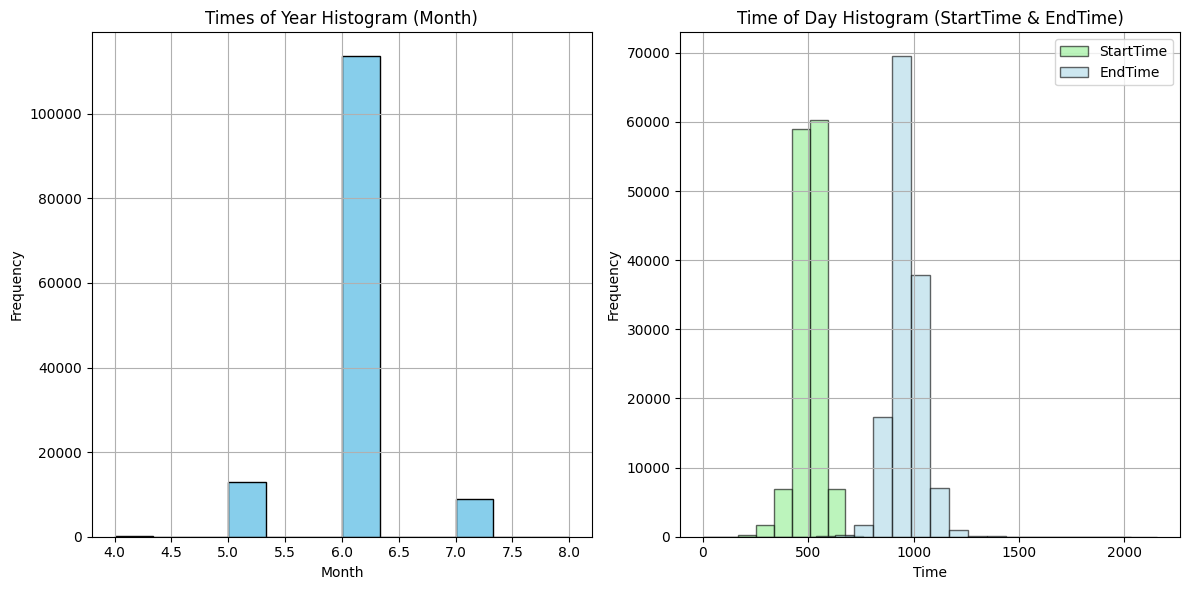

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Does it occur at all times during the year? --> Times of Year histogram.
weather['Month'].hist(ax=axes[0], bins=12, color='skyblue', edgecolor='black')
axes[0].set_title('Times of Year Histogram (Month)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')

# What time during the day (start - end)?
weather['StartTime_n'] = pd.to_numeric(weather['StartTime'], errors='coerce')
weather['EndTime_n'] = pd.to_numeric(weather['EndTime'], errors='coerce')
weather_graph = weather.dropna(subset=['StartTime_n', 'EndTime_n'])
weather_graph['StartTime_n'].hist(ax=axes[1], bins=24, alpha=0.6, color='lightgreen', edgecolor='black', label='StartTime')
weather_graph['EndTime_n'].hist(ax=axes[1], bins=24, alpha=0.6, color='lightblue', edgecolor='black', label='EndTime')

axes[1].set_title('Time of Day Histogram (StartTime & EndTime)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()


Pretty much only April through August, and done in the early mornings.

It seems to be useful for understanding specific patterns year-over-year, but not over times across the year.

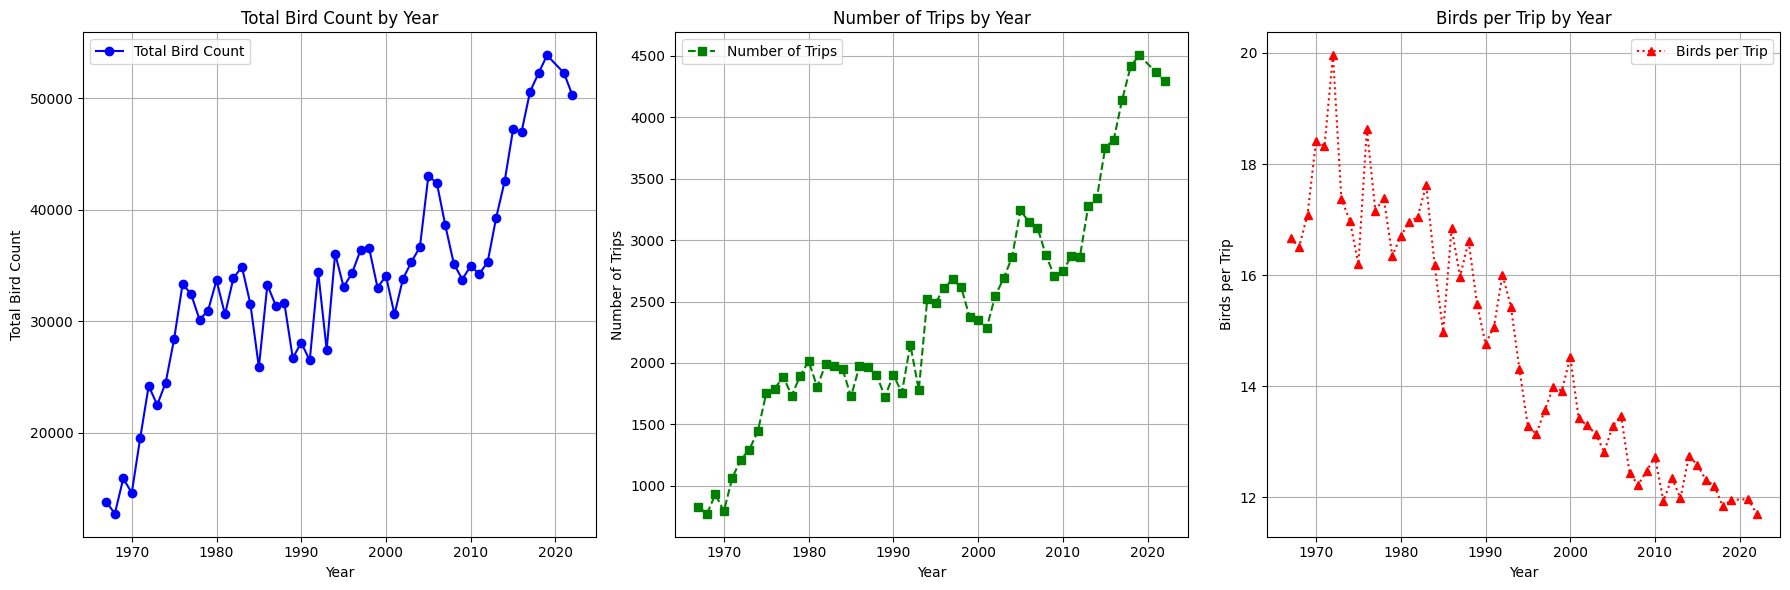

In [169]:
# How many bird sightings (in total) have there been over the years? # Just Missouri
yearly_totals = state_data.groupby(['Year'])['SpeciesTotal'].sum()
trip_totals = state_data.groupby('Year')['RouteDataID'].count()
species_count_per_year = yearly_totals / trip_totals

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Total Bird Count
ax1.plot(yearly_totals.index, yearly_totals.values, marker='o', linestyle='-', color='b', label='Total Bird Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Bird Count')
ax1.set_title('Total Bird Count by Year')
ax1.grid(True)
ax1.legend()

# Plot for Number of Trips
ax2.plot(trip_totals.index, trip_totals.values, marker='s', linestyle='--', color='g', label='Number of Trips')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Number of Trips by Year')
ax2.grid(True)
ax2.legend()

# Plot for Birds per Trip
ax3.plot(species_count_per_year.index, species_count_per_year.values, marker='^', linestyle=':', color='r', label='Birds per Trip')
ax3.set_xlabel('Year')
ax3.set_ylabel('Birds per Trip')
ax3.set_title('Birds per Trip by Year')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

Much older data. Looks like by 1970's -- pretty decent # of records. Still quite popular. Compared to iNaturalist which basically on goes back to late 2000s.

I think seeing less birds in recent years makes sense :(

In [233]:
# How much of the data follows 'good' standards? --> % of RPID that's 101
state_data['RPID'].value_counts() # 99.7% is gotten under sunny, good conditions.

RPID
101    131418
501        97
Name: count, dtype: int64

Seq    AOU English_Common_Name French_Common_Name Spanish_Common_Name  \
23  42  01320             Mallard     Canard colvert  Anas platyrhynchos   

           ORDER    Family Genus        Species  
23  Anseriformes  Anatidae  Anas  platyrhynchos

Mallard Total Count: 313


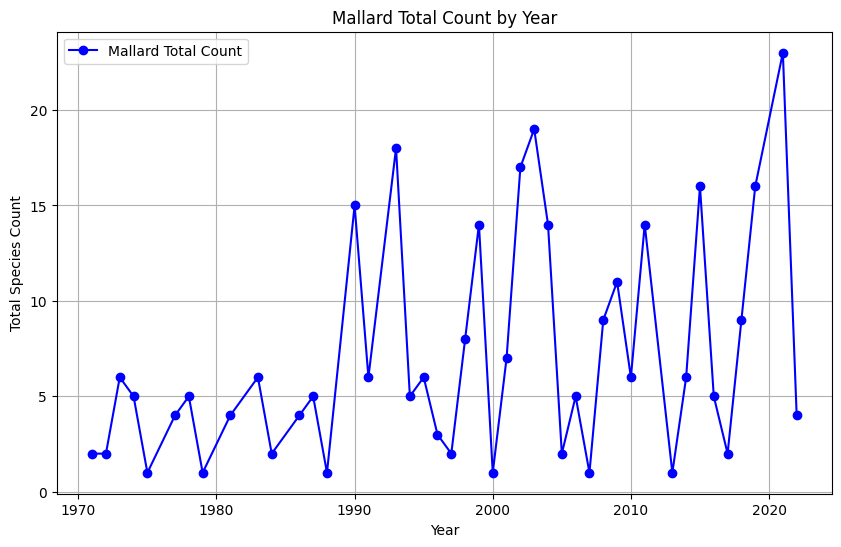

In [198]:
### How does it's spread of data compare to iNaturalist?

## One of most popular bird is Mallard.
# Mallard's (Anas platyrhynchos) have been seen ~1.6K times in Missouri since 2017 (technically since 2000, but barely any sightings (< 5))

# BreedingBirdSurvey
display(species[species['English_Common_Name'] == 'Mallard'])

mo_ballards = state_data[state_data['AOU'] == 1320]

bbs_mallard_yearly_totals = mo_ballards.groupby('Year')['SpeciesTotal'].sum()
print('Mallard Total Count:', bbs_mallard_yearly_totals.sum())

plt.figure(figsize=(10, 6))
plt.plot(bbs_mallard_yearly_totals.index, bbs_mallard_yearly_totals.values, marker='o', linestyle='-', color='b', label='Mallard Total Count')
plt.xlabel('Year')
plt.ylabel('Total Species Count')
plt.title('Mallard Total Count by Year')
plt.grid(True)
plt.legend()

plt.show()

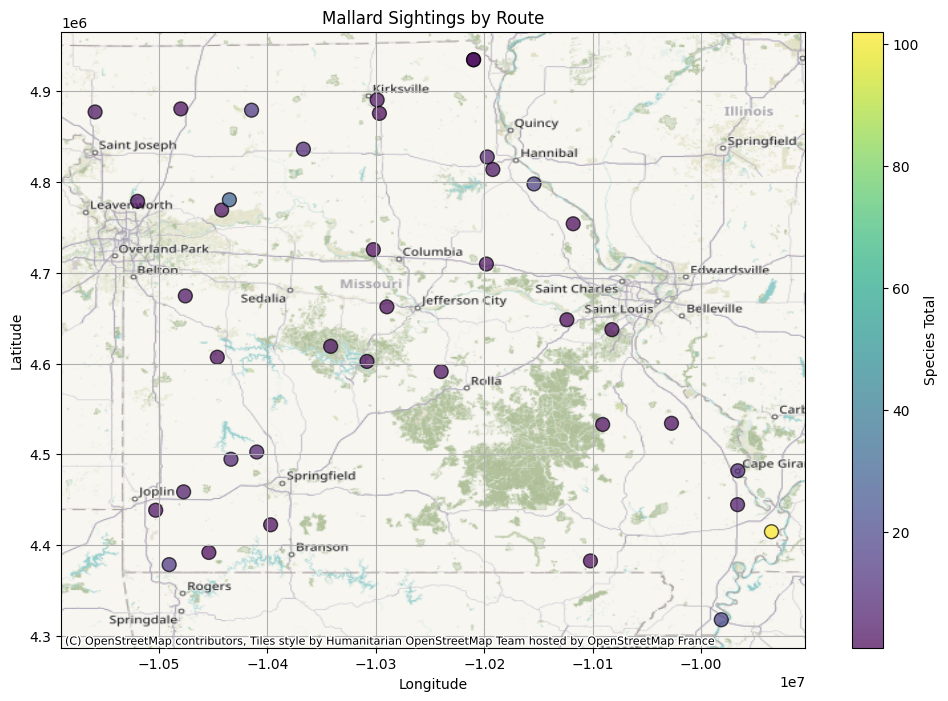

In [231]:
mo_ballards_by_route_all_years = pd.DataFrame(mo_ballards.groupby(['StateNum', 'Route'])['SpeciesTotal'].sum()).reset_index()
mo_ballards_w_latlon = mo_ballards_by_route_all_years.merge(routes_gdf[['StateNum', 'Route' ,'geometry']].drop_duplicates(), on = ['StateNum', 'Route'])

mo_ballards_gdf = gpd.GeoDataFrame(mo_ballards_w_latlon, geometry=mo_ballards_w_latlon['geometry'])
mo_ballards_gdf = mo_ballards_gdf.to_crs(epsg=3857)

# Plotting with matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with color map and larger dots
scatter = ax.scatter(
    mo_ballards_gdf.geometry.x,
    mo_ballards_gdf.geometry.y,
    c=mo_ballards_gdf['SpeciesTotal'],
    cmap='viridis',
    s=100,  # Size of dots
    edgecolor='k',  # Edge color for better visibility
    alpha=0.7  # Transparency
)

# Add map background
ctx.add_basemap(ax, crs=mo_ballards_gdf.crs.to_string())

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Species Total')

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mallard Sightings by Route')

# Show the plot
plt.grid(True)
plt.show()